In [854]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from utils import plot_clusters, plot
import numpy as np
import os
from pandas.api.types import is_string_dtype

### Загружаем данные

In [855]:
data_filenames = [name for name in os.listdir() if name.startswith("ЦУР")]
data_filenames

['ЦУР1.csv',
 'ЦУР11.csv',
 'ЦУР13.csv',
 'ЦУР15.csv',
 'ЦУР2.csv',
 'ЦУР3.csv',
 'ЦУР4.csv',
 'ЦУР5.csv',
 'ЦУР6.csv',
 'ЦУР7.csv',
 'ЦУР8.csv']

In [856]:
dfs = [pd.read_csv(filename, decimal=',') for filename in data_filenames]

### Удаляем 2023 2024 колонки

In [857]:
dfs = [df.drop("2023", axis=1) for df in dfs if "2023" in df.columns]
dfs = [df.drop("2024", axis=1) for df in dfs if "2024" in df.columns]

### Одинаковые название колонок

In [858]:
for df in dfs:
    df.columns = dfs[0].columns
    print(df.columns)

Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Index(['ЦУР', 'Субъект РФ', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')


### Склеиваем в один df

In [859]:
df_ro = pd.concat(dfs)

In [860]:
df_ro

,ЦУР,Субъект РФ,2016,2017,2018,2019,2020,2021,2022
0,1.2.2,РФ,"13,2","12,9","12,6","12,3","12,1","11,","9,8"
1,1.2.2,ЮФО,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.2.2,РО,"14,2","13,9","13,2","13,3","13,","12,","10,5"
3,1.3.1,РФ,230 710,299 752,308 815,326 293,604 856,980 845,909 426
4,1.3.1,Республика Адыгея (Адыгея),"139,","112,","118,","128,","143,",NaN,"2715,"
...,...,...,...,...,...,...,...,...,...
34,8.8.2,ЮФО,0.0,0.0,0.0,NaN,0.0,0.0,NaN
35,8.8.2,РО,14.2,13.9,13.2,13.3,13.0,12.0,10.5
36,8.9.1,РФ,3.4,2.7,2.7,2.8,2.4,2.6,2.62
37,8.9.1,ЮФО,NaN,NaN,NaN,4.7,4.1,4.6,NaN


In [861]:
df_ro.set_index("ЦУР", inplace=True)

### Достаем только РО

In [862]:
df_ro = df_ro[df_ro["Субъект РФ"] == "РО"]

In [863]:
df_ro

,Субъект РФ,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,,
1.2.2,РО,"14,2","13,9","13,2","13,3","13,","12,","10,5"
1.3.1,РО,2 241,2 029,4 905,8 689,6 921,NaN,23 687
1.4.1,РО,"61,2","63,","64,3","67,5","66,97","68,74","73,74"
1.4.2,РО,"6227,1","6233,7","6246,6","6255,6","6241,6","6245,7","6271,7"
1.5.1 Пострадавшие,РО,"135,","648,","50,","61,","281,","235,",NaN
...,...,...,...,...,...,...,...,...
8.8.1.b,РО,NaN,NaN,NaN,83.3,90.0,NaN,90.3
8.8.1.c,РО,NaN,NaN,NaN,0.89,3.22,NaN,NaN
8.8.1.d,РО,NaN,NaN,NaN,5.7,12.91,NaN,9.87


In [864]:
df_ro.drop("Субъект РФ", axis=1, inplace=True)

C:\Users\yxtag\AppData\Local\Temp\ipykernel_2728\3480877717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ro.drop("Субъект РФ", axis=1, inplace=True)


### Приведение типов

In [865]:
df_ro["2016"].str.replace(",", ".")

ЦУР
1.2.2                   14.2
1.3.1                  2 241
1.4.1                   61.2
1.4.2                 6227.1
1.5.1 Пострадавшие      135.
                       ...  
8.8.1.b                  NaN
8.8.1.c                  NaN
8.8.1.d                  NaN
8.8.2                    NaN
8.9.1                    NaN
Name: 2016, Length: 173, dtype: object

In [866]:
df_ro1 = pd.DataFrame(index=df_ro.index)

In [867]:
numeric_columns = df_ro.columns[1:]
for num_col in numeric_columns:
    df_ro1[num_col] = df_ro[num_col].str.replace(",", ".")
    df_ro1[num_col] = df_ro1[num_col].str.replace(" ", "")
    df_ro1[num_col] = df_ro1[num_col].str.replace("…", "")
    df_ro1[num_col] = df_ro1[num_col].str.replace("...", "") 
    df_ro1[num_col] = df_ro1[num_col].str.replace("–", "") 
    df_ro1[num_col] = df_ro1[num_col].str.replace("-", "")

In [868]:
df_ro = df_ro1.apply(pd.to_numeric)
del df_ro1

In [869]:
df_ro

,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,
1.2.2,13.9,13.2,13.3,13.00,12.00,10.50
1.3.1,2029.0,4905.0,8689.0,6921.00,NaN,23687.00
1.4.1,63.0,64.3,67.5,66.97,68.74,73.74
1.4.2,6233.7,6246.6,6255.6,6241.60,6245.70,6271.70
1.5.1 Пострадавшие,648.0,50.0,61.0,281.00,235.00,NaN
...,...,...,...,...,...,...
8.8.1.b,NaN,NaN,NaN,NaN,NaN,NaN
8.8.1.c,NaN,NaN,NaN,NaN,NaN,NaN
8.8.1.d,NaN,NaN,NaN,NaN,NaN,NaN


In [870]:
df_ro.dtypes

2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
dtype: object

### Работа с пропусками

In [871]:
nan_rows = df_ro[df_ro.isna().any(axis=1)]

In [872]:
nan_rows

,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,
1.3.1,2029.0,4905.0,8689.00,6921.00,NaN,23687.00
1.5.1 Пострадавшие,648.0,50.0,61.00,281.00,235.00,NaN
1.5.1 Погибшие,12.0,21.0,20.00,15.00,30.00,NaN
1.5.2,3819811.8,NaN,51276.00,451548.00,16227.00,4027.89
11.1.1,NaN,NaN,0.23,0.28,0.28,0.24
...,...,...,...,...,...,...
8.8.1.b,NaN,NaN,NaN,NaN,NaN,NaN
8.8.1.c,NaN,NaN,NaN,NaN,NaN,NaN
8.8.1.d,NaN,NaN,NaN,NaN,NaN,NaN


удаляем если больше половины пропусков

In [873]:
df_ro = df_ro.dropna(thresh=int(len(numeric_columns) / 2 + 1))

In [874]:
df_ro

,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,
1.2.2,13.9,13.2,13.3,13.00,12.00,10.50
1.3.1,2029.0,4905.0,8689.0,6921.00,NaN,23687.00
1.4.1,63.0,64.3,67.5,66.97,68.74,73.74
1.4.2,6233.7,6246.6,6255.6,6241.60,6245.70,6271.70
1.5.1 Пострадавшие,648.0,50.0,61.0,281.00,235.00,NaN
...,...,...,...,...,...,...
Т3.13.2,5838.0,4860.0,3861.0,28423.00,2695.00,2991.00
Т3.13.3,4626.0,3925.0,3065.0,23513.00,2281.00,2492.00
Т3.13.4,317.0,244.0,192.0,1803.00,118.00,124.00


In [875]:
df_ro[df_ro.isna().any(axis=1)] = df_ro[df_ro.isna().any(axis=1)].T.interpolate(method="linear", limit_direction='both').T

C:\Users\yxtag\AppData\Local\Temp\ipykernel_2728\3599901758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ro[df_ro.isna().any(axis=1)] = df_ro[df_ro.isna().any(axis=1)].T.interpolate(method="linear", limit_direction='both').T
C:\Users\yxtag\AppData\Local\Temp\ipykernel_2728\3599901758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ro[df_ro.isna().any(axis=1)] = df_ro[df_ro.isna().any(axis=1)].T.interpolate(method="linear", limit_direction='both').T


In [876]:
df_ro

,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,
1.2.2,13.9,13.2,13.3,13.00,12.00,10.50
1.3.1,2029.0,4905.0,8689.0,6921.00,15304.00,23687.00
1.4.1,63.0,64.3,67.5,66.97,68.74,73.74
1.4.2,6233.7,6246.6,6255.6,6241.60,6245.70,6271.70
1.5.1 Пострадавшие,648.0,50.0,61.0,281.00,235.00,235.00
...,...,...,...,...,...,...
Т3.13.2,5838.0,4860.0,3861.0,28423.00,2695.00,2991.00
Т3.13.3,4626.0,3925.0,3065.0,23513.00,2281.00,2492.00
Т3.13.4,317.0,244.0,192.0,1803.00,118.00,124.00


### Нормализация

In [877]:
scaler = StandardScaler()

In [878]:
scaled_rows = []
for i in range(df_ro.shape[0]):
    row = df_ro.iloc[i]
    scaled_row = scaler.fit_transform(row.values.reshape(-1, 1))
    scaled_rows.append([el[0] for el in scaled_row.tolist()])

# Convert the scaled rows back to a DataFrame
scaled_df_ro = pd.DataFrame(scaled_rows, columns=df_ro.columns)

In [879]:
scaled_df_ro.set_index(df_ro.index, inplace=True)

In [880]:
scaled_df_ro

,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,
1.2.2,1.121403,0.493417,0.583130,0.313993,-0.583130,-1.928814
1.3.1,-1.134028,-0.737586,-0.215980,-0.459690,0.695865,1.851420
1.4.1,-1.270454,-0.892948,0.036299,-0.117608,0.396382,1.848330
1.4.2,-1.287340,-0.212474,0.537433,-0.629088,-0.287464,1.878933
1.5.1 Пострадавшие,2.000428,-1.017880,-0.962359,0.148055,-0.084122,-0.084122
...,...,...,...,...,...,...
Т3.13.2,-0.248554,-0.355483,-0.464708,2.220766,-0.592192,-0.559829
Т3.13.3,-0.266918,-0.359348,-0.472743,2.223421,-0.576117,-0.548296
Т3.13.4,-0.248189,-0.369514,-0.455937,2.221514,-0.578923,-0.568951


### Сокращение размерности PCA (для визуализации)

In [881]:
pca = PCA(n_components=2)

In [882]:
scaled_df_ro_dim_red = pca.fit_transform(scaled_df_ro)

In [883]:
scaled_df_ro_dim_red = pd.DataFrame(data=scaled_df_ro_dim_red, columns=['PC1', 'PC2'], index=scaled_df_ro.index)

In [884]:
scaled_df_ro_dim_red

,PC1,PC2
ЦУР,,
1.2.2,-2.228961,0.881343
1.3.1,2.210449,-0.087042
1.4.1,2.177002,0.389205
1.4.2,1.514616,0.494418
1.5.1 Пострадавшие,-0.712066,-1.030657
...,...,...
Т3.13.2,-0.032738,1.846406
Т3.13.3,-0.005225,1.846597
Т3.13.4,-0.028960,1.850530


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


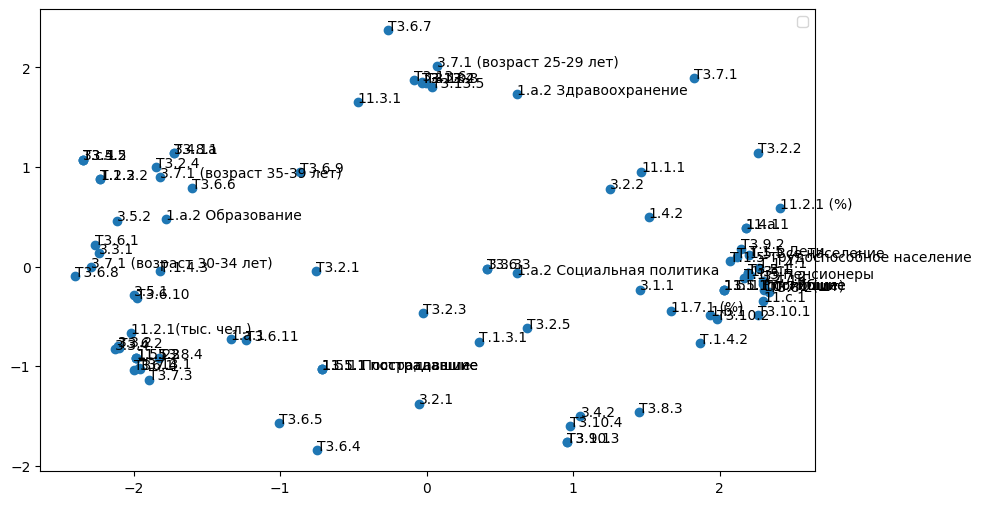

In [885]:
plot(scaled_df_ro_dim_red, "PC1", "PC2")

### Кластеризация

In [886]:
hierarchial_clustering = AgglomerativeClustering(n_clusters=6)

In [887]:
no_reduce_df_labels = hierarchial_clustering.fit_predict(scaled_df_ro)

In [888]:
df_ro_clusters = df_ro.copy()

In [889]:
df_ro_clusters["AgglomerativeClustering_6"] = no_reduce_df_labels
scaled_df_ro_dim_red["AgglomerativeClustering_6"] = no_reduce_df_labels

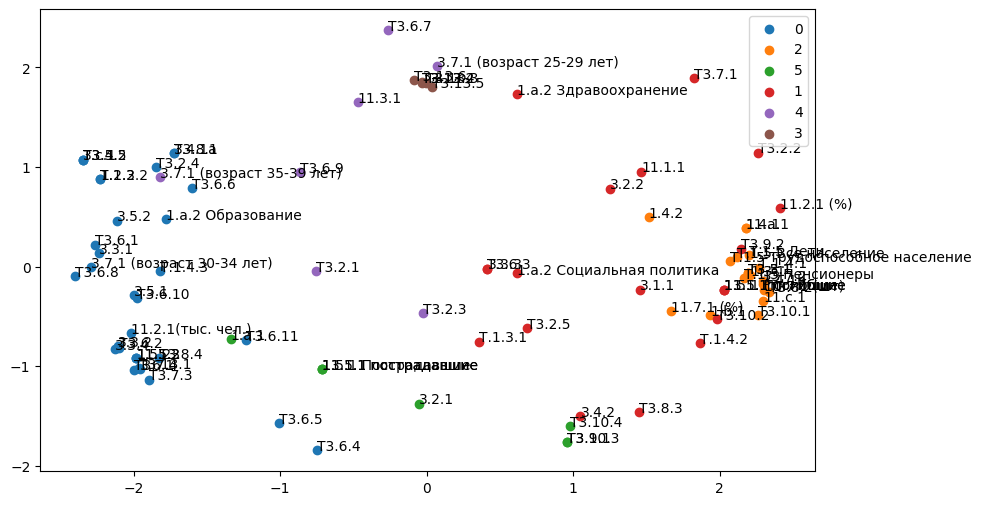

In [890]:
plot_clusters(scaled_df_ro_dim_red, "PC1", "PC2", "AgglomerativeClustering_6")

In [892]:
df_ro_clusters.to_csv("agglomerative_clustering_6_clusters.csv")

### Матрицы корреляций по кластерам

In [893]:
scaled_df_ro_clusters = scaled_df_ro.copy()
scaled_df_ro_clusters["AgglomerativeClustering_6"] = df_ro_clusters["AgglomerativeClustering_6"] = no_reduce_df_labels

In [898]:
scaled_df_ro_clusters["AgglomerativeClustering_6"].unique()

array([0, 2, 5, 1, 4, 3], dtype=int64)

In [899]:
clusters = []
for i in scaled_df_ro_clusters["AgglomerativeClustering_6"].unique():
    clusters.append(scaled_df_ro_clusters[scaled_df_ro_clusters["AgglomerativeClustering_6"] == i])

<Axes: xlabel='ЦУР', ylabel='ЦУР'>

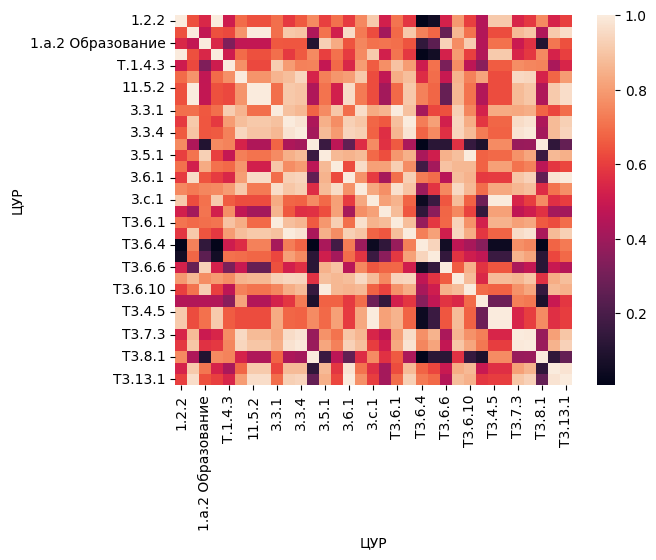

In [904]:
sns.heatmap(clusters[0].T.corr().abs())

<Axes: xlabel='ЦУР', ylabel='ЦУР'>

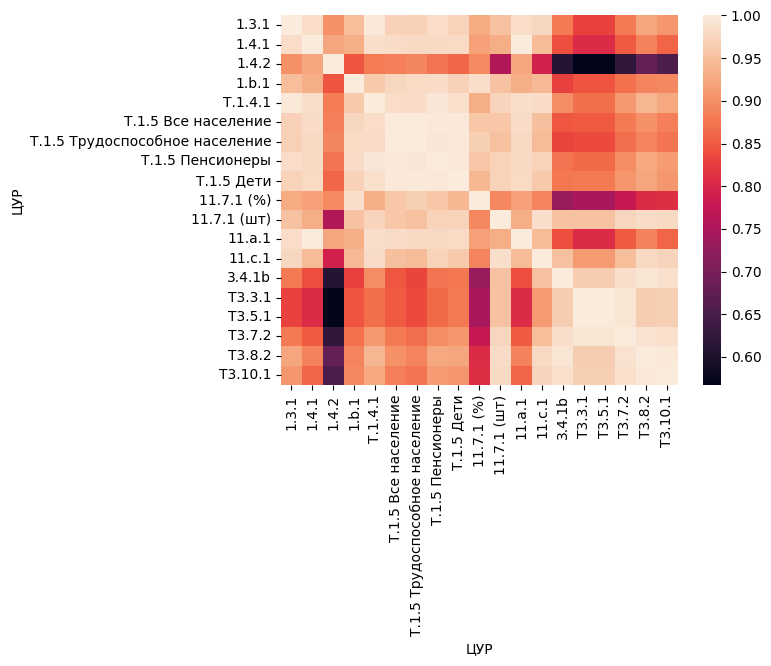

In [905]:
sns.heatmap(clusters[1].T.corr().abs())

<Axes: xlabel='ЦУР', ylabel='ЦУР'>

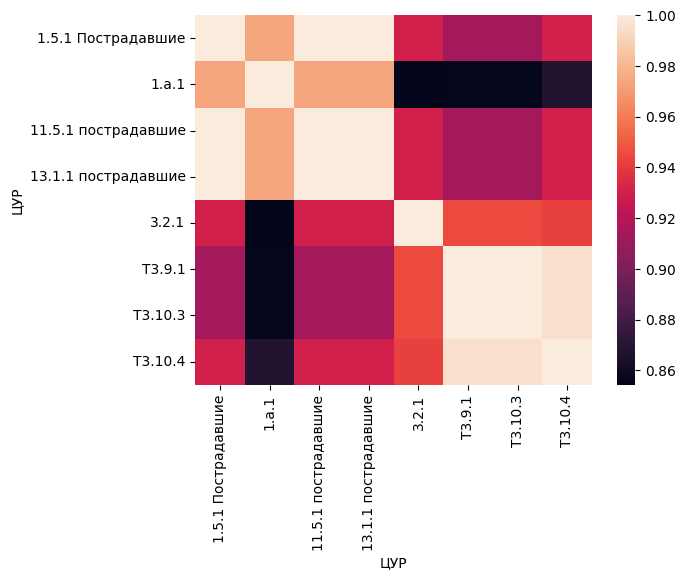

In [906]:
sns.heatmap(clusters[2].T.corr().abs())

<Axes: xlabel='ЦУР', ylabel='ЦУР'>

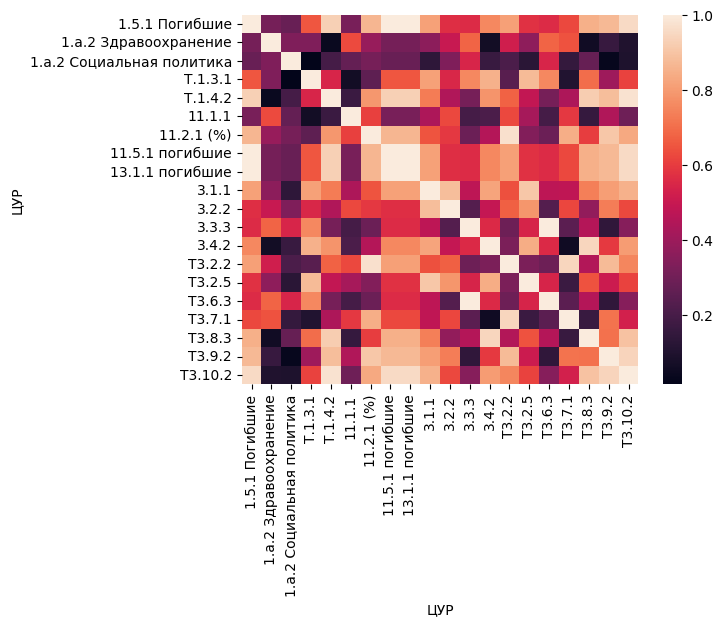

In [907]:
sns.heatmap(clusters[3].T.corr().abs())

<Axes: xlabel='ЦУР', ylabel='ЦУР'>

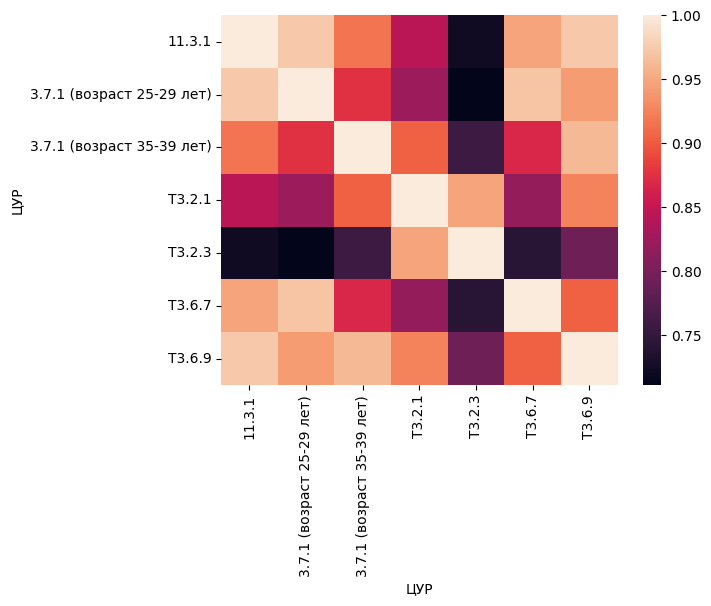

In [908]:
sns.heatmap(clusters[4].T.corr().abs())

<Axes: xlabel='ЦУР', ylabel='ЦУР'>

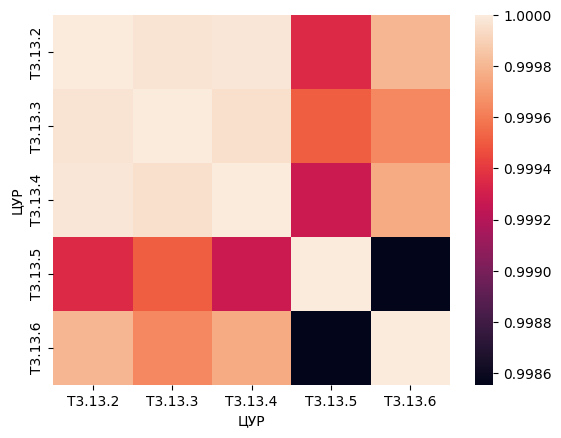

In [909]:
sns.heatmap(clusters[5].T.corr().abs())

In [917]:
clusters[5].T.corr().to_csv("cluster5.csv")